# Peak Location Histogram

Code to take scans from the OpenFlexure Microscope and plot the location of the sharpest image in each z stack. Allows comparison between the success of different scanning / focusing methods.

In [1]:
# Standard imports

import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
from collections import Counter
import os

The following commented-out cells are used with the images to generate stack data. Given our data's size and nature, we have not made it available here, and included the results instead. If running this notebook on your own files, adapt these cells as necessary and remove the lines importing our results

In [2]:
# # Link to a directory containing scan folders using the z stack procedure

# link = r"G:\smart_stacks"
# position_counter = []

# # Go through each z stack, and note the position of the sharpest image in the stack

# scan_list = [os.path.join(link, f) for f in os.listdir(link) if os.path.isdir(os.path.join(link, f))]
# for scan in scan_list:
#     coords_list = [os.path.join(scan, f) for f in os.listdir(scan) if os.path.isdir(os.path.join(scan, f)) and 'use' not in f]
#     for coords in coords_list:
#         try:
#             with open(os.path.join(coords, 'data.json'), "r") as read_file:
#                 data = json.load(read_file)
#             sharpnesses = data['stack_{0}'.format(len(data)-2)]["sharpness"]
#             position_counter.append(np.argmax(sharpnesses[-9:])-4)
#         except:
#             pass

# smart_stacks = Counter(position_counter)

In [3]:
# # Link to a directory containing scan folders using only the standard autofocus and taking a z stack of images

# link = r"G:\autofocus_only"
# autofocused_stacks = []

# scan_list = [os.path.join(link, f) for f in os.listdir(link) if os.path.isdir(os.path.join(link, f))]

# # Sort a folder of unsorted images in a single directory into x-y coordinate subfolders containing a z stack

# for scan in scan_list:
#     img_list = [os.path.join(scan, f) for f in os.listdir(scan) if os.path.isfile(os.path.join(scan, f))]
#     for img in img_list:
#         print(img)
#         name = os.path.split(img)[1]
#         print(name)
#         coord_link = os.path.join(scan, name.split('_')[2] + '_' + name.split('_')[3])
#         if not os.path.exists(coord_link):
#             os.mkdir(coord_link)
#         os.replace(img, os.path.join(coord_link, name))

# # Go through each z stack, and note the position of the sharpest image in the stack

# scan_list = [os.path.join(link, f) for f in os.listdir(link) if os.path.isdir(os.path.join(link, f))]
# for scan in scan_list:
#     coords_list = [os.path.join(scan, f) for f in os.listdir(scan) if os.path.isdir(os.path.join(scan, f)) and 'use' not in f]
#     for coords in coords_list:
#         img_list = [os.path.join(coords, f) for f in os.listdir(coords) if os.path.isfile(os.path.join(coords, f))]
#         img_list.sort(key= lambda i: int(re.findall(r'-?\d+',str(i))[-1]))
#         sharpnesses = [os.path.getsize(i) for i in img_list]
#         autofocused_stacks.append(np.argmax(sharpnesses)-4)

# autofocused_stacks = Counter(autofocused_stacks)

# Print the total number of z stacks from each method, and the Counter - a dictionary of the locations of the sharpest image, with values equal to the frequency.
# For example, '-1':7 would mean that in 7 of the stacks, the sharpest image is the image immediately before the central image.

# a_total = sum(autofocused_stacks.values())
# print('Number of old stacks is {0}'.format(a_total))
# for i in autofocused_stacks.keys():
#     autofocused_stacks[i] = autofocused_stacks[i] / a_total * 100
# print(autofocused_stacks)

# s_total = sum(smart_stacks.values())
# print('Number of new stacks is {0}'.format(total))
# for i in smart_stacks.keys():
#     smart_stacks[i] = smart_stacks[i] / total * 100
# print(smart_stacks)

In [4]:
autofocused_stacks = Counter({-4: 2354.0, -3: 1272.0, -2: 283.0, -1: 91.0, 0: 49.0, 1: 28.0, 2: 8.0, 4: 8.0, 3: 7.0})
a_total = sum(autofocused_stacks.values())
print('Number of autofocused stacks is {0}'.format(a_total))
for i in autofocused_stacks.keys():
    autofocused_stacks[i] = autofocused_stacks[i] / a_total * 100
print(autofocused_stacks)

smart_stacks = Counter({1: 808.0, 0: 379.0, -1: 24.0, 2: 13.0, -2: 2.0, -4: 1.0})
S_total = sum(smart_stacks.values())
print('Number of smart stacks is {0}'.format(S_total))
for i in smart_stacks.keys():
    smart_stacks[i] = smart_stacks[i] / S_total * 100
print(smart_stacks)

# Data for historical health clinic stacks obtained separately, but included here to recreate plot from publication.

IHI = Counter({-4: 9396, -2: 7764, -1: 7484, 0: 7313, -3: 7240, 4: 6803, 1: 5915, 3: 3860, 2: 3652})
I_total = sum(IHI.values())
print('Number of IHI stacks is {0}'.format(I_total))
for i in IHI.keys():
    IHI[i] = IHI[i] / I_total * 100
print(IHI)

Number of autofocused stacks is 4100.0
Counter({-4: 57.414634146341456, -3: 31.024390243902438, -2: 6.902439024390245, -1: 2.219512195121951, 0: 1.1951219512195121, 1: 0.6829268292682927, 2: 0.1951219512195122, 4: 0.1951219512195122, 3: 0.17073170731707318})
Number of smart stacks is 1227.0
Counter({1: 65.8516707416463, 0: 30.888345558272206, -1: 1.9559902200488997, 2: 1.0594947025264874, -2: 0.16299918500407498, -4: 0.08149959250203749})
Number of IHI stacks is 59427
Counter({-4: 15.810995002271694, -2: 13.064768539552729, -1: 12.593602234674476, 0: 12.305854241338112, -3: 12.183014454709138, 4: 11.447658471738436, 1: 9.953388190553115, 3: 6.495364060107359, 2: 6.145354805054941})


    IHI Autofocus Stacks  Bath Autofocus Stacks  Bath Smart Stacks
-4             15.810995              57.414634           0.081500
-3             12.183014              31.024390                NaN
-2             13.064769               6.902439           0.162999
-1             12.593602               2.219512           1.955990
 0             12.305854               1.195122          30.888346
 1              9.953388               0.682927          65.851671
 2              6.145355               0.195122           1.059495
 3              6.495364               0.170732                NaN
 4             11.447658               0.195122                NaN


[]

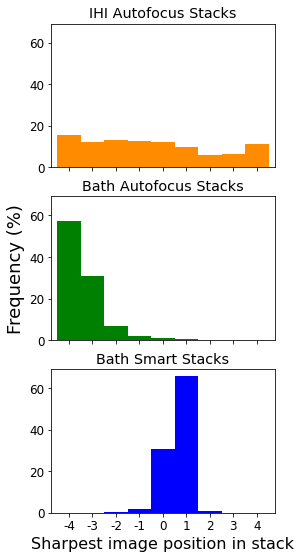

In [5]:
# Convert the 3 Counters into a pandas dataframe for easier manipulation and plotting

frame = pd.DataFrame([IHI, autofocused_stacks, smart_stacks]).T
frame = frame.rename(columns={0: "IHI Autofocus Stacks", 1: "Bath Autofocus Stacks", 2: "Bath Smart Stacks"})
frame = frame.sort_index()
print(frame)

# Plot 3 stacked bar charts with the frequency of each position, separated by scan method

plt.rcParams.update({'font.size': 12})
axes = frame.plot(kind='bar', stacked=False, width=1.0, figsize = (4,9), color = ['darkorange', 'green', 'blue'], subplots=True, sharex=True, sharey=True, legend=False, rot=0)
axes[2].set_xlabel('Sharpest image position in stack', size = 16)
axes[1].set_ylabel('Frequency (%)', size = 18)

plt.plot()